**1. Downloading S&P 500 Price Data**

In [ ]:
# yfinance package calls the Yahoo Finance API
import yfinance as yf

In [2]:
# Initialize a Ticker object for the S&P 500 index using yfinance
sp500 = yf.Ticker("^GSPC")

In [3]:
# Retrieve the complete historical market data for the S&P 500 index, including prices and volumes, across its entire history available on Yahoo Finance.
sp500 = sp500.history(period="max")

In [4]:
# Display the history extracted
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-01 00:00:00-05:00,4861.109863,4906.970215,4853.520020,4906.189941,4386090000,0.0,0.0
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,0.0,0.0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,0.0,0.0


In [5]:
# Display the index of the sp500 Dataframe
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-01-25 00:00:00-05:00', '2024-01-26 00:00:00-05:00',
               '2024-01-29 00:00:00-05:00', '2024-01-30 00:00:00-05:00',
               '2024-01-31 00:00:00-05:00', '2024-02-01 00:00:00-05:00',
               '2024-02-02 00:00:00-05:00', '2024-02-05 00:00:00-05:00',
               '2024-02-06 00:00:00-05:00', '2024-02-07 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24141, freq=None)

**2. Cleaning & Visualizing Our Stock Market Data**

<Axes: xlabel='Date'>

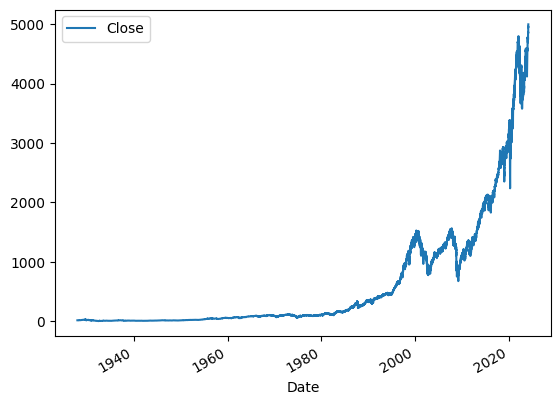

In [6]:
# Plot the closing prices of the S&P 500 index over time using a line chart. The x-axis automatically uses the DataFrame's index, which are the dates.
sp500.plot.line(y="Close", use_index=True)

In [7]:
# Removing "Dividends" and "Stock Splits" columns
del sp500["Dividends"]
del sp500["Stock Splits"]

**3. Machine Learning Model**

In [8]:
# Create a new column 'Tomorrow' in the sp500 DataFrame that contains tomorrow's closing price.
# This is achieved by shifting the 'Close' column one day forward, making it possible to compare today's and tomorrow's prices for predictive analysis.
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-02-01 00:00:00-05:00,4861.109863,4906.970215,4853.520020,4906.189941,4386090000,4958.609863
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980


In [10]:
# Generate the 'Target' column in the sp500 DataFrame, indicating the direction of the stock's movement.
# It assigns a value of 1 if the price goes up the following day (i.e., if 'Tomorrow' > 'Close'), and 0 if it does not.
# This binary outcome serves as the target variable for predictive modeling.
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-01 00:00:00-05:00,4861.109863,4906.970215,4853.520020,4906.189941,4386090000,4958.609863,1
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1


In [12]:
# Filter the sp500 DataFrame to include only the data from January 1, 1990, onwards.
# This is done to focus the analysis on a more recent and possibly more relevant time period for the predictive model.
# The `.copy()` method ensures that a new DataFrame is created, avoiding potential warnings or errors related to modifying a slice of the original DataFrame.
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-01 00:00:00-05:00,4861.109863,4906.970215,4853.520020,4906.189941,4386090000,4958.609863,1
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1


**4. Training The Machine Learning Model**

In [14]:
# Import the RandomForestClassifier from sklearn.ensemble for predictive modeling.
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with 100 trees, a minimum of 100 samples required to split a node,
# and a fixed random state for reproducible results.
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Split the sp500 DataFrame into training and testing sets. The last 100 rows are used for testing,
# and the rest for training, to evaluate the model's performance on unseen data.
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

# Define the features (predictors) used for the prediction: closing price, volume, opening price,
# highest price of the day, and lowest price of the day.
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Fit the RandomForest model to the training data, using the specified predictors to forecast the 'Target' variable.
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
# Import the precision_score function from sklearn.metrics to evaluate the model's performance.
from sklearn.metrics import precision_score

# Use the trained RandomForest model to make predictions on the test set, using the same predictors as during training.
preds = model.predict(test[predictors])

In [16]:
# Import the pandas library for data manipulation and analysis.
import pandas as pd

# Convert the predictions array into a pandas Series with the same index as the test dataset.
# This aligns the predictions with the corresponding dates, facilitating further analysis and visualization.
preds = pd.Series(preds, index=test.index)

In [17]:
precision_score(test["Target"], preds)

0.5625

<Axes: xlabel='Date'>

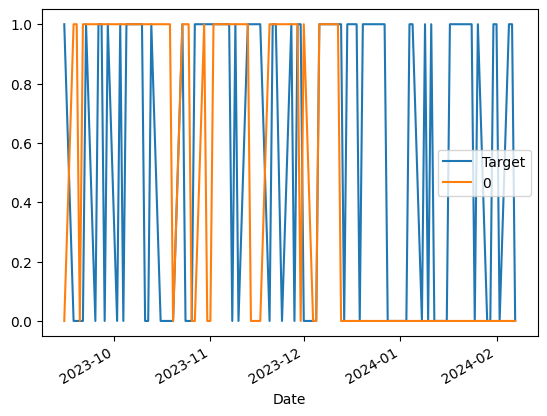

In [18]:
# Combine the actual target values from the test set with the predicted values into a single DataFrame for comparison.
combined = pd.concat([test["Target"], preds], axis=1)

# Plot the actual versus predicted values to visually assess the model's performance.
# This plot can help in identifying how well the predictions align with the actual market movements over the test period.
combined.plot()

**5. Building A Backtesting System**

In [21]:
# Define a function 'predict' to streamline the prediction process using a given model and data.
def predict(train, test, predictors, model):
  # Fit the model on the training data.
  model.fit(train[predictors], train["Target"])

  # Predict the target values for the test data.
  preds = model.predict(test[predictors])

  # Convert the predictions into a pandas Series, aligning them with the test data's index for easy comparison.
  preds = pd.Series(preds, index=test.index, name="Predictions")

  # Combine the actual targets from the test set with the predictions into a single DataFrame.
  combined = pd.concat([test["Target"], preds], axis=1)

  # Return the DataFrame containing both actual and predicted values.
  return combined

In [22]:
# Define a function 'backtest' to evaluate the performance of the model over time using a rolling window approach.
def backtest(data, model, predictors, start=2500, step=250):
  # Initialize a list to store predictions from each iteration of the backtest.
  all_predictions = []

  # Loop through the data in steps, starting from 'start' to the end of 'data', using 'step' as the window size.
  for i in range(start, data.shape[0], step):
    # Split the data into training set (up to current index 'i') and test set (the next 'step' observations).
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()

    # Use the previously defined 'predict' function to fit the model and make predictions on the test set.
    predictions = predict(train, test, predictors, model)

    # Append the predictions to the list of all predictions.
    all_predictions.append(predictions)

  # Combine all predictions into a single DataFrame for analysis.
  return pd.concat(all_predictions)

In [23]:
# Execute the backtest function on the sp500 data with the specified model and predictors.
# This will train the model on sequential segments of the data, testing it on the following segment,
# and aggregate the predictions into a single DataFrame.
predictions = backtest(sp500, model, predictors)

In [24]:
# Count and display the frequency of each unique prediction value (1 for price increase, 0 for price decrease)
# in the 'Predictions' column of the 'predictions' DataFrame. This helps in evaluating the model's prediction bias.
predictions["Predictions"].value_counts()

0    3495
1    2596
Name: Predictions, dtype: int64

In [25]:
# Calculate and return the precision score of the model's predictions.
# Precision is the ratio of true positive predictions to the total number of positive predictions (true positives + false positives).
# This metric helps assess the accuracy of the model's positive predictions (i.e., predicting a price increase).
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [26]:
# Calculate the proportion of each actual outcome (1 for price increase, 0 for price decrease) in the 'Target' column of the 'predictions' DataFrame.
# Dividing by the total number of observations gives the relative frequency of each outcome, providing insight into the dataset's balance.
predictions["Target"].value_counts()/predictions.shape[0]

1    0.534723
0    0.465277
Name: Target, dtype: float64

**6. Adding Additional Predictors To Our Model**

In [27]:
# Define a list of time horizons for calculating rolling averages and trends.
horizons = [2,5,60,250,1000]
new_predictors = []  # Initialize an empty list to store the names of new predictor variables.

for horizon in horizons:
  # Calculate the rolling average of the 'Close' prices over each specified horizon.
  rolling_averages = sp500.rolling(horizon).mean()

  # Create a new column for each horizon that represents the ratio of the current 'Close' price to its rolling average.
  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"]

  # Create another new column for each horizon that sums the 'Target' values over the past 'horizon' days, indicating the trend.
  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  # Add the names of these new columns to the 'new_predictors' list for future reference.
  new_predictors += [ratio_column, trend_column]

In [28]:
# Remove all rows with missing values (NaNs) from the sp500 DataFrame.
# This is a crucial step before training a machine learning model to ensure it operates on complete data,
# avoiding errors or biases caused by missing information.
sp500 = sp500.dropna()

In [29]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31 00:00:00-05:00,4899.189941,4906.750000,4845.149902,4845.649902,4696120000,4906.189941,1,0.991882,0.0,0.989567,2.0,1.039463,39.0,1.112925,136.0,1.210560,527.0
2024-02-01 00:00:00-05:00,4861.109863,4906.970215,4853.520020,4906.189941,4386090000,4958.609863,1,1.006208,1.0,1.001439,2.0,1.050393,39.0,1.126078,136.0,1.225211,527.0
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0,1.005314,2.0,1.009351,3.0,1.059375,39.0,1.137251,137.0,1.237813,527.0


**7. Improving Our Model**

In [30]:
# Reinitialize the RandomForestClassifier with updated parameters to potentially improve model performance.
# Increase the number of trees in the forest to 200 and reduce the minimum number of samples required to split an internal node to 50,
# while keeping the random state fixed at 1 for reproducibility.
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [31]:
# Redefine the predict function to incorporate a probability threshold for making binary predictions.
# This version fits the model on the training data and uses predict_proba to estimate probabilities for the test set.
# It then converts probabilities into binary predictions based on a threshold of 0.6,
# where probabilities equal to or greater than 0.6 are classified as 1 (price increase), and below 0.6 as 0 (price decrease).
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])  # Train the model using the specified predictors and target.

  # Predict the probability of the positive class (price increase).
  preds = model.predict_proba(test[predictors])[:,1]

  # Apply the threshold to convert probabilities to binary predictions.
  preds[preds >= .6] = 1  # Classify as 1 (increase) if probability is >= 0.6.
  preds[preds < .6] = 0   # Otherwise, classify as 0 (decrease).

  # Create a pandas Series for the predictions, aligning them with the test dataset's index for comparison.
  preds = pd.Series(preds, index=test.index, name="Predictions")

  # Combine the actual targets with the binary predictions into a single DataFrame for analysis.
  combined = pd.concat([test["Target"], preds], axis=1)

  return combined  # Return the DataFrame containing both actual targets and predictions.

In [32]:
# Execute the backtesting process using the redefined predict function and the updated RandomForest model with new predictors.
# This will train and test the model across different segments of the sp500 DataFrame,
# evaluating its performance over time with the newly added features for a more comprehensive analysis.
predictions = backtest(sp500, model, new_predictors)

In [33]:
# Count and display the frequency of each unique prediction value (1 for price increase, 0 for price decrease)
# in the 'Predictions' column of the 'predictions' DataFrame. This helps in evaluating the model's prediction bias.
predictions["Predictions"].value_counts()

0.0    4258
1.0     832
Name: Predictions, dtype: int64

In [34]:
# Calculate and return the precision score of the model's predictions.
precision_score(predictions["Target"], predictions["Predictions"])

0.5733173076923077

**8. Improving Further - RSI Calculation Integration**

In [43]:
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

# Download S&P 500 data
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

# Define a function to calculate the Relative Strength Index (RSI), a momentum indicator in financial analysis.
def calculate_rsi(data, window=14):
    # Calculate daily price changes.
    delta = data['Close'].diff()
    # Separate gains and losses from the daily price changes, average them over the specified window.
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    # Calculate the Relative Strength (RS) and convert it to RSI.
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI and add it to the DataFrame
sp500['RSI'] = calculate_rsi(sp500)

# Prepare the target variable
sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)
sp500 = sp500.loc["1990-01-01":].dropna().copy()  # Ensure modifications are on a DataFrame that's safe to change

# Define predictors including RSI
predictors = ["Close", "Volume", "Open", "High", "Low", "RSI"]

# Split the dataset
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
model.fit(train[predictors], train["Target"])

# Predict and evaluate the model
preds = model.predict(test[predictors])
precision = precision_score(test["Target"], preds)
print(f"Precision Score: {precision}")

Precision Score: 0.6153846153846154
